<a href="https://colab.research.google.com/github/DataScienceLab-DSLABI/Ensemble-Anomaly-Detection/blob/main/DS_LAB_1_Baseline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! mkdir ~/.kaggle

In [3]:
!cp /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/kaggle.json


In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d icsdataset/hai-security-dataset

100% 798M/798M [00:11<00:00, 74.7MB/s]
100% 798M/798M [00:11<00:00, 70.3MB/s]


In [6]:
! unzip hai-security-dataset.zip

Archive:  hai-security-dataset.zip
  inflating: graph/boiler/dcs_1001h.json  
  inflating: graph/boiler/dcs_1001h.png  
  inflating: graph/boiler/dcs_1002h.json  
  inflating: graph/boiler/dcs_1002h.png  
  inflating: graph/boiler/dcs_1003h.json  
  inflating: graph/boiler/dcs_1003h.png  
  inflating: graph/boiler/dcs_1004h.json  
  inflating: graph/boiler/dcs_1004h.png  
  inflating: graph/boiler/dcs_1010h.json  
  inflating: graph/boiler/dcs_1010h.png  
  inflating: graph/boiler/dcs_1011h.json  
  inflating: graph/boiler/dcs_1011h.png  
  inflating: graph/boiler/dcs_1020h.json  
  inflating: graph/boiler/dcs_1020h.png  
  inflating: graph/boiler/phy_boiler.json  
  inflating: graph/boiler/phy_boiler.png  
  inflating: graph/graph_analysis.ipynb  
  inflating: hai-20.07/test1.csv     
  inflating: hai-20.07/test2.csv     
  inflating: hai-20.07/train1.csv    
  inflating: hai-20.07/train2.csv    
  inflating: hai-21.03/test1.csv     
  inflating: hai-21.03/test2.csv     
  inflating: 

In [7]:
import pandas as pd

In [8]:
df_train1 = pd.read_csv('/content/hai-22.04/train1.csv')

In [9]:
df_train2 = pd.read_csv('/content/hai-22.04/train2.csv')

In [10]:
df_train3 = pd.read_csv('/content/hai-22.04/train3.csv')

In [11]:
df_train4 = pd.read_csv('/content/hai-22.04/train4.csv')

In [12]:
df_train5 = pd.read_csv('/content/hai-22.04/train5.csv')

In [13]:
df_train6 = pd.read_csv('/content/hai-22.04/train6.csv')

In [14]:
df_test1 = pd.read_csv('/content/hai-22.04/test1.csv')

In [15]:
df_test2 = pd.read_csv('/content/hai-22.04/test2.csv')

In [16]:
df_test3 = pd.read_csv('/content/hai-22.04/test3.csv')

In [17]:
df_test4 = pd.read_csv('/content/hai-22.04/test4.csv')

In [18]:
df_Train = df_train6

In [19]:
df_Test = df_test4

In [20]:
df_ALL = pd.concat([df_Train,df_Test], ignore_index=True)

In [21]:
num_rows, num_cols = df_ALL.shape

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 388800
Number of columns: 88


**Display and describe the data**

In [22]:
df_Train.head()

,timestamp,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,Attack
0,2021-08-06 09:00:01,0.09631,0.98680,476.44827,993.42383,32.0,100.0,3177.11230,35.46829,100.0,...,6.34956,294.46979,-0.00094,16364,294.28894,300.51001,8.27546,9999,27205,0
1,2021-08-06 09:00:02,0.09631,0.98543,476.44827,993.42383,32.0,100.0,3182.61768,35.46371,100.0,...,6.34956,294.90381,0.00065,16303,294.72296,299.85895,8.27546,9999,27206,0
2,2021-08-06 09:00:03,0.09631,0.98566,476.44827,993.42383,32.0,100.0,3182.74292,35.46448,100.0,...,6.34956,298.43024,-0.00217,16406,298.05048,300.94403,8.27546,9999,27213,0
3,2021-08-06 09:00:04,0.09631,0.98234,476.44827,993.42383,32.0,100.0,3179.48975,35.45341,100.0,...,6.34956,301.61316,0.00130,16446,302.51733,302.49927,8.27546,9999,27205,0
4,2021-08-06 09:00:05,0.09631,0.98817,476.44827,993.42383,32.0,100.0,3177.11230,35.47287,100.0,...,6.34956,309.10010,-0.00145,16551,308.39484,303.96411,8.27546,9999,27210,0


In [23]:
df_Test.head()

,timestamp,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,Attack
0,2021-07-15 12:00:01,0.19464,0.99918,489.16266,1047.13831,25.46139,0.0,32.97053,28.64319,4.52908,...,5.03592,276.72888,-0.00072,14809,276.47565,270.30890,28.4608,9972,27057,0
1,2021-07-15 12:00:02,0.19464,0.99918,489.16266,1047.13831,25.46139,0.0,29.99137,28.64319,4.52908,...,5.03592,280.74365,-0.00029,14908,281.72021,272.31628,28.4608,9972,27051,0
2,2021-07-15 12:00:03,0.19464,1.00650,489.16266,1047.13831,25.46139,0.0,30.98430,28.66761,4.48789,...,5.03592,287.21783,-0.00260,15124,287.50726,275.24597,28.4608,9972,27050,0
3,2021-07-15 12:00:04,0.19464,1.01303,489.16266,1047.13831,25.46139,0.0,32.97053,28.68935,4.47755,...,5.03592,293.40277,-0.00181,15234,294.28894,277.75964,28.4608,9972,27050,0
4,2021-07-15 12:00:05,0.19464,1.02012,489.16266,1047.13831,25.46139,0.0,32.97053,28.71300,4.51440,...,5.03592,296.74841,-0.00109,15376,295.98883,280.21918,28.4608,9972,27058,0


In [24]:
df_ALL.head()

,timestamp,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,Attack
0,2021-08-06 09:00:01,0.09631,0.98680,476.44827,993.42383,32.0,100.0,3177.11230,35.46829,100.0,...,6.34956,294.46979,-0.00094,16364,294.28894,300.51001,8.27546,9999,27205,0
1,2021-08-06 09:00:02,0.09631,0.98543,476.44827,993.42383,32.0,100.0,3182.61768,35.46371,100.0,...,6.34956,294.90381,0.00065,16303,294.72296,299.85895,8.27546,9999,27206,0
2,2021-08-06 09:00:03,0.09631,0.98566,476.44827,993.42383,32.0,100.0,3182.74292,35.46448,100.0,...,6.34956,298.43024,-0.00217,16406,298.05048,300.94403,8.27546,9999,27213,0
3,2021-08-06 09:00:04,0.09631,0.98234,476.44827,993.42383,32.0,100.0,3179.48975,35.45341,100.0,...,6.34956,301.61316,0.00130,16446,302.51733,302.49927,8.27546,9999,27205,0
4,2021-08-06 09:00:05,0.09631,0.98817,476.44827,993.42383,32.0,100.0,3177.11230,35.47287,100.0,...,6.34956,309.10010,-0.00145,16551,308.39484,303.96411,8.27546,9999,27210,0


In [25]:
df_Train.describe()

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,Attack
count,259200.000000,259200.00000,259200.000000,259200.000000,259200.000000,259200.000000,259200.000000,259200.000000,259200.000000,259200.000000,...,259200.000000,259200.000000,259200.000000,259200.000000,259200.000000,259200.000000,259200.000000,259200.000000,259200.000000,259200.0
mean,0.124835,1.10653,448.660921,1009.342048,31.407774,92.383394,2942.842726,35.180069,88.835944,89.254170,...,3.474197,366.117862,-0.000029,18067.928870,330.992421,331.258768,12.608794,9973.381474,27280.175320,0.0
std,0.041589,0.10260,28.188166,39.038789,1.503523,24.384918,770.815531,1.531546,25.136413,25.400452,...,3.741219,59.880538,0.001640,1749.375984,35.758688,32.287839,13.753672,22.893563,78.150059,0.0
min,0.060830,0.78265,396.683040,951.369260,26.041370,0.000000,17.081060,29.146510,1.778520,0.306700,...,0.000000,232.132510,-0.012590,12925.000000,232.186770,236.490910,0.000000,9834.000000,26998.000000,0.0
25%,0.098440,1.04139,434.844060,976.467530,31.548540,100.000000,3177.362790,35.209470,92.083610,92.637630,...,0.000000,318.992310,-0.001090,17076.000000,307.599120,313.024480,3.481090,9968.000000,27236.000000,0.0
50%,0.114920,1.10571,452.391300,1012.014280,32.000000,100.000000,3183.243410,35.610130,100.000000,100.282280,...,1.294500,364.565250,-0.000070,18037.000000,330.964290,330.656800,10.733520,9973.000000,27274.000000,0.0
75%,0.166780,1.17112,469.146240,1030.604610,32.000000,100.000000,3188.123050,35.859300,100.000000,100.740050,...,6.561320,414.062500,0.001010,19057.000000,353.823060,349.392330,15.238640,9998.000000,27319.000000,0.0
max,0.198460,1.62739,496.014710,1110.036130,33.048470,100.000000,3190.000000,37.768740,100.000000,100.762940,...,10.000000,499.312810,0.040510,26826.000000,496.853270,494.267210,50.000000,10195.000000,27543.000000,0.0


In [26]:
df_Test.describe()

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,Attack
count,129600.000000,129600.000000,129600.000000,129600.000000,129600.000000,129600.000000,129600.000000,129600.000000,129600.000000,129600.000000,...,129600.000000,129600.000000,129600.000000,129600.000000,129600.000000,129600.000000,129600.000000,129600.000000,129600.000000,129600.000000
mean,0.115783,1.108963,454.016721,1011.474169,25.665021,10.867804,346.586848,29.475678,9.915436,9.490678,...,4.288056,366.512806,-0.000024,18279.336127,334.098159,334.363649,18.370883,9973.818333,27054.488511,0.034128
std,0.030014,0.109043,20.765086,28.187576,0.067150,15.124039,468.713602,0.351829,6.634874,6.833500,...,2.611195,59.283106,0.001646,1914.092136,38.947866,35.433585,8.607517,28.094692,71.166853,0.181559
min,0.063240,0.785150,419.726500,955.511410,25.461390,0.000000,11.122750,28.355570,0.000000,0.291440,...,2.403980,230.523010,-0.011280,12806.000000,230.975100,234.284610,6.828800,9748.000000,26901.000000,0.000000
25%,0.087930,1.042410,432.869480,973.447330,25.687170,0.000000,27.012220,29.268760,4.818848,4.541010,...,2.403980,319.299740,-0.001090,17170.000000,308.611820,313.928650,6.828800,9951.000000,26993.000000,0.000000
50%,0.112380,1.102670,456.424710,1019.379640,25.687170,4.367945,199.810150,29.461780,8.066540,7.657625,...,3.344280,364.492920,0.000000,18171.000000,332.953550,332.157840,21.921890,9973.000000,27058.000000,0.000000
75%,0.145770,1.166585,467.038540,1032.923220,25.687170,14.994300,388.497960,29.651370,14.767672,14.283750,...,3.344280,413.791260,0.001010,19213.000000,355.595340,351.399720,26.760940,9999.000000,27106.000000,0.000000
max,0.194640,1.584440,489.162660,1047.185670,25.687170,67.147870,2228.758060,31.027710,35.038990,34.913640,...,9.960400,498.589420,0.015480,26731.000000,497.233090,493.037480,28.460800,10225.000000,27255.000000,1.000000


In [27]:
df_ALL.describe()

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,Attack
count,388800.000000,388800.000000,388800.000000,388800.000000,388800.000000,388800.000000,388800.000000,388800.000000,388800.000000,388800.000000,...,388800.000000,388800.000000,388800.000000,388800.000000,388800.000000,388800.000000,388800.000000,388800.000000,388800.000000,388800.000000
mean,0.121818,1.107341,450.446188,1010.052755,29.493523,65.211531,2077.424100,33.278605,62.529108,62.666340,...,3.745484,366.249510,-0.000027,18138.397955,332.027667,332.293728,14.529490,9973.527094,27204.946384,0.011376
std,0.038361,0.104798,26.073313,35.803241,2.972758,44.150706,1402.582249,2.972568,42.661484,43.122106,...,3.427987,59.682273,0.001642,1808.696592,36.881446,33.401426,12.577095,24.749842,130.685357,0.106050
min,0.060830,0.782650,396.683040,951.369260,25.461390,0.000000,11.122750,28.355570,0.000000,0.291440,...,0.000000,230.523010,-0.012590,12806.000000,230.975100,234.284610,0.000000,9748.000000,26901.000000,0.000000
25%,0.096310,1.041680,432.869480,976.467530,25.687170,11.687330,265.354250,29.646030,13.470453,13.146970,...,1.039340,319.100830,-0.001090,17106.000000,307.924620,313.331910,4.962950,9965.000000,27097.000000,0.000000
50%,0.112380,1.104650,456.424710,1015.947750,31.548540,100.000000,3177.362790,35.209470,92.083510,92.637630,...,3.344280,364.529050,-0.000070,18083.000000,331.633360,331.145080,12.278840,9973.000000,27236.000000,0.000000
75%,0.150150,1.169610,467.038540,1032.374880,32.000000,100.000000,3185.620610,35.733030,100.000000,100.518790,...,6.561320,413.954040,0.001010,19110.000000,354.401790,350.079590,19.691260,9999.000000,27296.000000,0.000000
max,0.198460,1.627390,496.014710,1110.036130,33.048470,100.000000,3190.000000,37.768740,100.000000,100.762940,...,10.000000,499.312810,0.040510,26826.000000,497.233090,494.267210,50.000000,10225.000000,27543.000000,1.000000


**Convert timestamp into datetime and set it as an index**

In [28]:
df_ALL['timestamp'] = pd.to_datetime(df_ALL['timestamp'])


In [29]:
df_ALL.set_index('timestamp')

,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,P1_FCV01Z,...,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,Attack
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-08-06 09:00:01,0.09631,0.98680,476.44827,993.42383,32.00000,100.00000,3177.11230,35.46829,100.00000,100.73242,...,6.34956,294.46979,-0.00094,16364,294.28894,300.51001,8.27546,9999,27205,0
2021-08-06 09:00:02,0.09631,0.98543,476.44827,993.42383,32.00000,100.00000,3182.61768,35.46371,100.00000,100.73242,...,6.34956,294.90381,0.00065,16303,294.72296,299.85895,8.27546,9999,27206,0
2021-08-06 09:00:03,0.09631,0.98566,476.44827,993.42383,32.00000,100.00000,3182.74292,35.46448,100.00000,100.73242,...,6.34956,298.43024,-0.00217,16406,298.05048,300.94403,8.27546,9999,27213,0
2021-08-06 09:00:04,0.09631,0.98234,476.44827,993.42383,32.00000,100.00000,3179.48975,35.45341,100.00000,100.73242,...,6.34956,301.61316,0.00130,16446,302.51733,302.49927,8.27546,9999,27205,0
2021-08-06 09:00:05,0.09631,0.98817,476.44827,993.42383,32.00000,100.00000,3177.11230,35.47287,100.00000,100.74005,...,6.34956,309.10010,-0.00145,16551,308.39484,303.96411,8.27546,9999,27210,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-16 23:59:56,0.06944,1.04908,467.03854,1015.06964,25.68717,29.89865,1056.03259,29.45263,14.31306,15.03143,...,2.40398,373.20966,0.00036,17966,318.08813,327.31122,26.76094,9917,26971,0
2021-07-16 23:59:57,0.06944,1.05057,467.03854,1015.06964,25.68717,29.95392,1026.05530,29.45758,15.02294,13.74206,...,2.40398,376.66376,-0.00470,18073,317.78070,327.36548,26.76094,9917,26970,0
2021-07-16 23:59:58,0.06944,1.04839,467.03854,1015.06964,25.68717,29.99687,981.37659,29.45034,16.00788,13.64288,...,2.40398,377.76691,-0.00130,17983,319.11890,326.62396,26.76094,9916,26973,0


In [30]:
import matplotlib.pyplot as plt

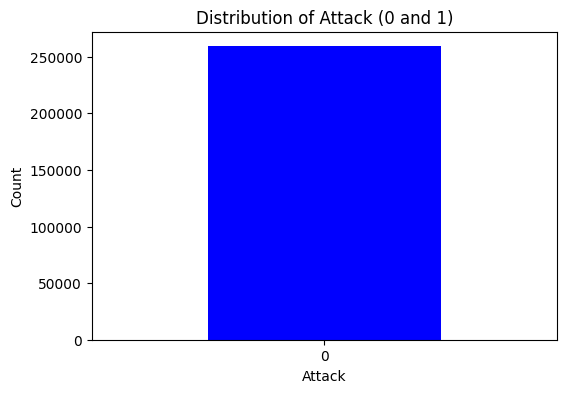

In [31]:
plt.figure(figsize=(6, 4))
df_Train['Attack'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Attack (0 and 1)')
plt.xlabel('Attack')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

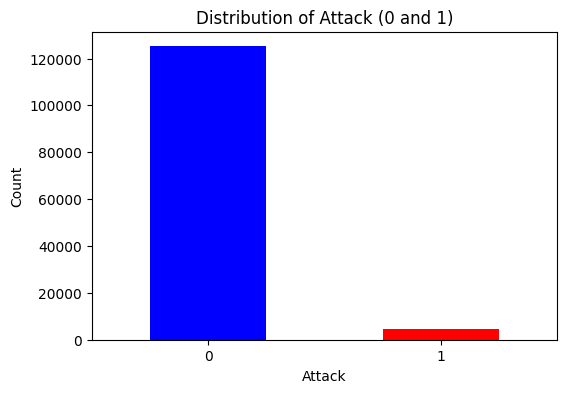

In [32]:
plt.figure(figsize=(6, 4))
df_Test['Attack'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Attack (0 and 1)')
plt.xlabel('Attack')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

**Check for null values**

In [33]:
null_counts = df_ALL.isnull().sum()
for i in null_counts:
  if i!=0:
    print(null_counts)
else:
    print("the dataset does not have null values")

the dataset does not have null values


**Check for duplicates**

In [34]:
duplicates = df_ALL[df_ALL.duplicated()]

if duplicates.empty:
    print("No duplicates found.")
else:
    print("Duplicates found:")
    print(duplicates)

No duplicates found.


**check for columns with one value: **

In [35]:
# Get the number of unique values in each column
unique_counts = df_ALL.nunique()

# Filter columns with only one unique value
columns_with_one_value = unique_counts[unique_counts == 1].index.tolist()

if columns_with_one_value:
    print("Columns with only one unique value:")
    print(columns_with_one_value)
else:
    print("No columns with only one unique value.")

Columns with only one unique value:
['P1_PIT01_HH', 'P1_PP01AD', 'P1_PP01AR', 'P1_PP01BD', 'P1_PP01BR', 'P1_PP02D', 'P1_PP02R', 'P1_SOL01D', 'P1_SOL03D', 'P1_STSP', 'P2_RTR', 'P2_TripEx', 'P2_VTR01', 'P2_VTR02', 'P2_VTR03', 'P2_VTR04', 'P3_LH01', 'P3_LL01']


In [36]:
# Drop the identified columns
df_ALL.drop(columns=columns_with_one_value, inplace=True)
print("Columns dropped:", columns_with_one_value)

Columns dropped: ['P1_PIT01_HH', 'P1_PP01AD', 'P1_PP01AR', 'P1_PP01BD', 'P1_PP01BR', 'P1_PP02D', 'P1_PP02R', 'P1_SOL01D', 'P1_SOL03D', 'P1_STSP', 'P2_RTR', 'P2_TripEx', 'P2_VTR01', 'P2_VTR02', 'P2_VTR03', 'P2_VTR04', 'P3_LH01', 'P3_LL01']


In [37]:
df_ALL.head()

,timestamp,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,Attack
0,2021-08-06 09:00:01,0.09631,0.98680,476.44827,993.42383,32.0,100.0,3177.11230,35.46829,100.0,...,6.34956,294.46979,-0.00094,16364,294.28894,300.51001,8.27546,9999,27205,0
1,2021-08-06 09:00:02,0.09631,0.98543,476.44827,993.42383,32.0,100.0,3182.61768,35.46371,100.0,...,6.34956,294.90381,0.00065,16303,294.72296,299.85895,8.27546,9999,27206,0
2,2021-08-06 09:00:03,0.09631,0.98566,476.44827,993.42383,32.0,100.0,3182.74292,35.46448,100.0,...,6.34956,298.43024,-0.00217,16406,298.05048,300.94403,8.27546,9999,27213,0
3,2021-08-06 09:00:04,0.09631,0.98234,476.44827,993.42383,32.0,100.0,3179.48975,35.45341,100.0,...,6.34956,301.61316,0.00130,16446,302.51733,302.49927,8.27546,9999,27205,0
4,2021-08-06 09:00:05,0.09631,0.98817,476.44827,993.42383,32.0,100.0,3177.11230,35.47287,100.0,...,6.34956,309.10010,-0.00145,16551,308.39484,303.96411,8.27546,9999,27210,0


**Check for highly correlated columns**

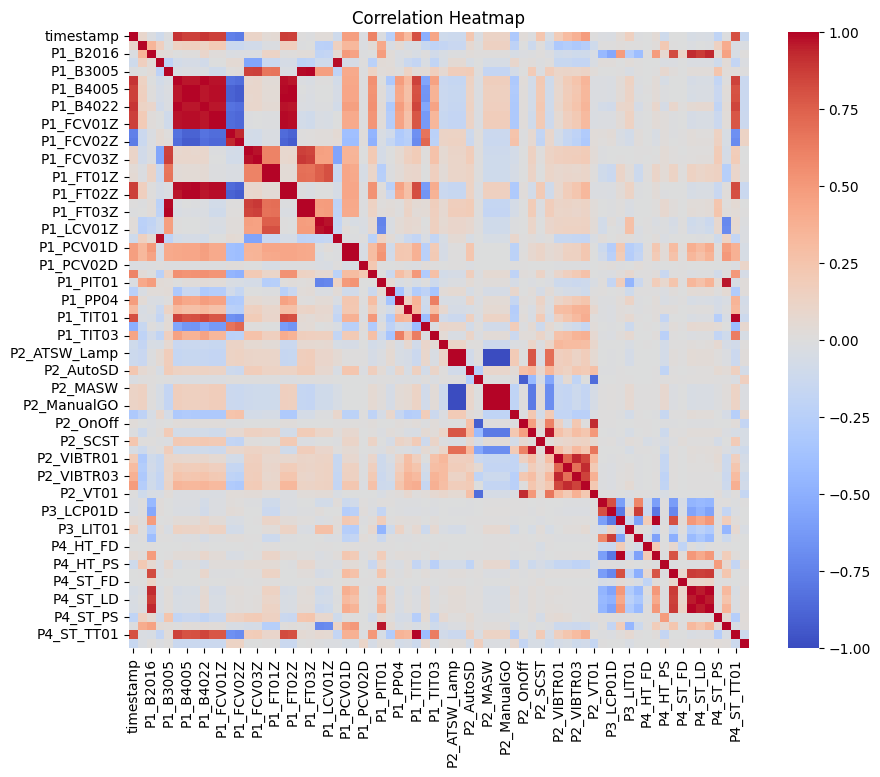

In [38]:
import seaborn as sns
# Compute the correlation matrix
corr_matrix = df_ALL.corr()
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [39]:
df_corr = df_ALL.corr().abs()
written = []
highly_correlated_columns = []
written1 = []
for column in df_corr:
    for index in df_corr.index[df_corr[column] > 0.9]:
        if index not in written:
            if index != column:
              print(f"{column} and {index} have a correlation of {df_corr[column][index]:.2f}")
              written.append(column)
              highly_correlated_columns.append(df_corr[column][index])
              written1.append(index)


P1_B2016 and P4_ST_GOV have a correlation of 0.93
P1_B2016 and P4_ST_PO have a correlation of 0.93
P1_B3004 and P1_LIT01 have a correlation of 0.98
P1_B3005 and P1_FT03 have a correlation of 0.99
P1_B3005 and P1_FT03Z have a correlation of 0.99
P1_B4002 and P1_B4005 have a correlation of 0.97
P1_B4002 and P1_B400B have a correlation of 0.97
P1_B4002 and P1_B4022 have a correlation of 0.99
P1_B4002 and P1_FCV01D have a correlation of 0.97
P1_B4002 and P1_FCV01Z have a correlation of 0.97
P1_B4002 and P1_FT02 have a correlation of 0.98
P1_B4002 and P1_FT02Z have a correlation of 0.97
P1_B4005 and P1_B400B have a correlation of 1.00
P1_B4005 and P1_B4022 have a correlation of 0.96
P1_B4005 and P1_FCV01D have a correlation of 0.98
P1_B4005 and P1_FCV01Z have a correlation of 0.98
P1_B4005 and P1_FCV02Z have a correlation of 0.93
P1_B4005 and P1_FT02 have a correlation of 0.99
P1_B4005 and P1_FT02Z have a correlation of 1.00
P1_B400B and P1_B4022 have a correlation of 0.96
P1_B400B and P1_F

In [40]:
# Remove one of the highly correlated features
Corr = list(zip(written1, written,highly_correlated_columns))
# Count the number of highly correlated columns
num_highly_correlated = len(highly_correlated_columns)
print(f"Number of highly correlated columns: {num_highly_correlated}")

Number of highly correlated columns: 63


In [41]:
columns_to_drop = []
for pair in Corr:
    print(pair[0]," ",pair[1])
    if pair[0] not in columns_to_drop and pair[1] not in columns_to_drop:
        columns_to_drop.append(pair[1])

P4_ST_GOV   P1_B2016
P4_ST_PO   P1_B2016
P1_LIT01   P1_B3004
P1_FT03   P1_B3005
P1_FT03Z   P1_B3005
P1_B4005   P1_B4002
P1_B400B   P1_B4002
P1_B4022   P1_B4002
P1_FCV01D   P1_B4002
P1_FCV01Z   P1_B4002
P1_FT02   P1_B4002
P1_FT02Z   P1_B4002
P1_B400B   P1_B4005
P1_B4022   P1_B4005
P1_FCV01D   P1_B4005
P1_FCV01Z   P1_B4005
P1_FCV02Z   P1_B4005
P1_FT02   P1_B4005
P1_FT02Z   P1_B4005
P1_B4022   P1_B400B
P1_FCV01D   P1_B400B
P1_FCV01Z   P1_B400B
P1_FCV02Z   P1_B400B
P1_FT02   P1_B400B
P1_FT02Z   P1_B400B
P1_FCV01D   P1_B4022
P1_FCV01Z   P1_B4022
P1_FT02   P1_B4022
P1_FT02Z   P1_B4022
P1_FCV01Z   P1_FCV01D
P1_FT02   P1_FCV01D
P1_FT02Z   P1_FCV01D
P1_FT02   P1_FCV01Z
P1_FT02Z   P1_FCV01Z
P1_FCV02Z   P1_FCV02D
P1_FT02Z   P1_FCV02Z
P1_FCV03Z   P1_FCV03D
P1_FT01Z   P1_FT01
P1_FT02Z   P1_FT02
P1_FT03Z   P1_FT03
P1_LCV01Z   P1_LCV01D
P1_PCV01Z   P1_PCV01D
P4_ST_PT01   P1_PIT01
P4_ST_TT01   P1_TIT01
P2_AutoGO   P2_ATSW_Lamp
P2_MASW   P2_ATSW_Lamp
P2_MASW_Lamp   P2_ATSW_Lamp
P2_ManualGO   P2_ATSW_La

In [42]:
df_ALL.head()


,timestamp,P1_B2004,P1_B2016,P1_B3004,P1_B3005,P1_B4002,P1_B4005,P1_B400B,P1_B4022,P1_FCV01D,...,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_GOV,P4_ST_LD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,Attack
0,2021-08-06 09:00:01,0.09631,0.98680,476.44827,993.42383,32.0,100.0,3177.11230,35.46829,100.0,...,6.34956,294.46979,-0.00094,16364,294.28894,300.51001,8.27546,9999,27205,0
1,2021-08-06 09:00:02,0.09631,0.98543,476.44827,993.42383,32.0,100.0,3182.61768,35.46371,100.0,...,6.34956,294.90381,0.00065,16303,294.72296,299.85895,8.27546,9999,27206,0
2,2021-08-06 09:00:03,0.09631,0.98566,476.44827,993.42383,32.0,100.0,3182.74292,35.46448,100.0,...,6.34956,298.43024,-0.00217,16406,298.05048,300.94403,8.27546,9999,27213,0
3,2021-08-06 09:00:04,0.09631,0.98234,476.44827,993.42383,32.0,100.0,3179.48975,35.45341,100.0,...,6.34956,301.61316,0.00130,16446,302.51733,302.49927,8.27546,9999,27205,0
4,2021-08-06 09:00:05,0.09631,0.98817,476.44827,993.42383,32.0,100.0,3177.11230,35.47287,100.0,...,6.34956,309.10010,-0.00145,16551,308.39484,303.96411,8.27546,9999,27210,0


In [43]:
df_ALL.drop(columns=columns_to_drop, inplace=True)
print("%d highly correlated columns removed."%len(columns_to_drop))
print("Columns droped:", list(columns_to_drop))

31 highly correlated columns removed.
Columns droped: ['P1_B2016', 'P1_B3004', 'P1_B3005', 'P1_B4002', 'P1_B4005', 'P1_B400B', 'P1_B4022', 'P1_FCV01D', 'P1_FCV01Z', 'P1_FCV02D', 'P1_FCV02Z', 'P1_FCV03D', 'P1_FT01', 'P1_FT02', 'P1_FT03', 'P1_LCV01D', 'P1_PCV01D', 'P1_PIT01', 'P1_TIT01', 'P2_ATSW_Lamp', 'P2_AutoGO', 'P2_Emerg', 'P2_MASW', 'P2_MASW_Lamp', 'P2_OnOff', 'P2_SCO', 'P2_VIBTR01', 'P2_VIBTR02', 'P3_LCV01D', 'P4_ST_GOV', 'P4_ST_LD']


In [44]:
df_ALL.set_index('timestamp', inplace = True )

**Feature selection**

In [45]:
from sklearn.ensemble import RandomForestClassifier

X = df_ALL.drop(columns=['Attack'])

y = df_ALL['Attack']

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X, y)

feature_importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("Top features by importance:")
print(feature_importance_df)

Top features by importance:
        Feature  Importance
14     P1_TIT03    0.084659
13     P1_TIT02    0.070395
20     P2_SIT01    0.068068
7     P1_PCV01Z    0.065288
5     P1_LCV01Z    0.053722
36   P4_ST_TT01    0.050231
11      P1_PP04    0.046214
6      P1_LIT01    0.044811
2      P1_FT01Z    0.044710
1     P1_FCV03Z    0.043744
35   P4_ST_PT01    0.039566
26     P3_LIT01    0.039560
3      P1_FT02Z    0.037756
10     P1_PIT02    0.029128
4      P1_FT03Z    0.028209
0      P1_B2004    0.026847
16    P2_AutoSD    0.022413
31        P4_LD    0.022179
25    P3_LCP01D    0.021713
9     P1_PCV02Z    0.020979
33     P4_ST_PO    0.018468
29     P4_HT_PO    0.018404
21   P2_VIBTR03    0.016729
34     P4_ST_PS    0.012991
23      P2_VT01    0.012091
24     P3_FIT01    0.011933
27     P3_PIT01    0.011193
30     P4_HT_PS    0.008023
22   P2_VIBTR04    0.007020
18  P2_ManualSD    0.005758
28     P4_HT_FD    0.004640
12    P1_PP04SP    0.004588
19      P2_SCST    0.002621
17  P2_ManualGO    0

In [46]:
selected_features = feature_importance_df[feature_importance_df['Importance'] >= 0.007]['Feature'].tolist() + list(y)
df_ALL.drop(columns=[col for col in df_ALL.columns if col not in selected_features or col == 'Attack'])
df_ALL = df_ALL.merge(y, left_index=True, right_index=True)

In [47]:
df_ALL.head()

,P1_B2004,P1_FCV03Z,P1_FT01Z,P1_FT02Z,P1_FT03Z,P1_LCV01Z,P1_LIT01,P1_PCV01Z,P1_PCV02D,P1_PCV02Z,...,P4_HT_PO,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,Attack_x,Attack_y
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-08-06 09:00:01,0.09631,47.85309,307.06436,3182.74292,988.33459,13.02490,498.70712,36.46240,12.0,12.24670,...,0.14465,6.34956,294.46979,-0.00094,300.51001,8.27546,9999,27205,0,0
2021-08-06 09:00:02,0.09631,47.85309,303.09189,3179.48975,987.46484,12.97913,498.80930,36.51580,12.0,12.24670,...,0.14465,6.34956,294.90381,0.00065,299.85895,8.27546,9999,27206,0,0
2021-08-06 09:00:03,0.09631,47.85309,305.07812,3177.11230,987.89978,12.97913,498.80930,36.52344,12.0,12.25433,...,0.14465,6.34956,298.43024,-0.00217,300.94403,8.27546,9999,27213,0,0
2021-08-06 09:00:04,0.09631,47.84546,306.07104,3177.98804,986.59528,12.97913,498.75821,36.53869,12.0,12.23907,...,0.14465,6.34956,301.61316,0.00130,302.49927,8.27546,9999,27205,0,0
2021-08-06 09:00:05,0.09631,48.62366,303.09189,3171.60693,987.03003,12.97913,498.19592,36.56921,12.0,12.24670,...,0.14465,6.34956,309.10010,-0.00145,303.96411,8.27546,9999,27210,0,0


Categorical data

In [48]:
cols = df_ALL.columns

In [49]:
 num_cols = df_ALL._get_numeric_data().columns

In [50]:
print("categorical data: ")
list(set(cols) - set(num_cols))

categorical data: 


[]

Normalization: do the normalization on the df_ALL

In [51]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming 'df_ALL' is your original DataFrame with a datetime index
# Backup the datetime index
original_index = df_ALL.index

# Select only numerical columns from the DataFrame
numerical_columns = df_ALL.select_dtypes(include=['number'])

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the data
normalized_data = scaler.fit_transform(numerical_columns)

# Convert the normalized data back to a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=numerical_columns.columns)

# Restore the original datetime index
normalized_df.index = original_index

# Now 'normalized_df' contains the normalized data with the original datetime index intact
print(normalized_df.head())  # Print the first few rows of the normalized DataFrame


                     P1_B2004  P1_FCV03Z  P1_FT01Z  P1_FT02Z  P1_FT03Z  \
timestamp                                                                
2021-08-06 09:00:01  0.257793   0.130036  0.321967  0.997717  0.321109   
2021-08-06 09:00:02  0.257793   0.130036  0.317758  0.996694  0.317386   
2021-08-06 09:00:03  0.257793   0.130036  0.319863  0.995946  0.319248   
2021-08-06 09:00:04  0.257793   0.129637  0.320915  0.996221  0.313664   
2021-08-06 09:00:05  0.257793   0.170323  0.317758  0.994214  0.315525   

                     P1_LCV01Z  P1_LIT01  P1_PCV01Z  P1_PCV02D  P1_PCV02Z  \
timestamp                                                                   
2021-08-06 09:00:01   0.325477  0.812707   0.320721        0.0   0.089385   
2021-08-06 09:00:02   0.324309  0.813368   0.321509        0.0   0.089385   
2021-08-06 09:00:03   0.324309  0.813368   0.321622        0.0   0.092179   
2021-08-06 09:00:04   0.324309  0.813038   0.321847        0.0   0.086592   
2021-08-06 09:00:05

In [52]:
normalized_df.head()

,P1_B2004,P1_FCV03Z,P1_FT01Z,P1_FT02Z,P1_FT03Z,P1_LCV01Z,P1_LIT01,P1_PCV01Z,P1_PCV02D,P1_PCV02Z,...,P4_HT_PO,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,Attack_x,Attack_y
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-08-06 09:00:01,0.257793,0.130036,0.321967,0.997717,0.321109,0.325477,0.812707,0.320721,0.0,0.089385,...,0.000592,0.634956,0.237906,0.219397,0.254730,0.165509,0.526205,0.473520,0.0,0.0
2021-08-06 09:00:02,0.257793,0.130036,0.317758,0.996694,0.317386,0.324309,0.813368,0.321509,0.0,0.089385,...,0.000592,0.634956,0.239521,0.249341,0.252226,0.165509,0.526205,0.475078,0.0,0.0
2021-08-06 09:00:03,0.257793,0.130036,0.319863,0.995946,0.319248,0.324309,0.813368,0.321622,0.0,0.092179,...,0.000592,0.634956,0.252641,0.196234,0.256400,0.165509,0.526205,0.485981,0.0,0.0
2021-08-06 09:00:04,0.257793,0.129637,0.320915,0.996221,0.313664,0.324309,0.813038,0.321847,0.0,0.086592,...,0.000592,0.634956,0.264482,0.261582,0.262382,0.165509,0.526205,0.473520,0.0,0.0
2021-08-06 09:00:05,0.257793,0.170323,0.317758,0.994214,0.315525,0.324309,0.809398,0.322297,0.0,0.089385,...,0.000592,0.634956,0.292337,0.209793,0.268016,0.165509,0.526205,0.481308,0.0,0.0


In [53]:
df_ALL = normalized_df

In [54]:
df_ALL.head()

,P1_B2004,P1_FCV03Z,P1_FT01Z,P1_FT02Z,P1_FT03Z,P1_LCV01Z,P1_LIT01,P1_PCV01Z,P1_PCV02D,P1_PCV02Z,...,P4_HT_PO,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,Attack_x,Attack_y
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-08-06 09:00:01,0.257793,0.130036,0.321967,0.997717,0.321109,0.325477,0.812707,0.320721,0.0,0.089385,...,0.000592,0.634956,0.237906,0.219397,0.254730,0.165509,0.526205,0.473520,0.0,0.0
2021-08-06 09:00:02,0.257793,0.130036,0.317758,0.996694,0.317386,0.324309,0.813368,0.321509,0.0,0.089385,...,0.000592,0.634956,0.239521,0.249341,0.252226,0.165509,0.526205,0.475078,0.0,0.0
2021-08-06 09:00:03,0.257793,0.130036,0.319863,0.995946,0.319248,0.324309,0.813368,0.321622,0.0,0.092179,...,0.000592,0.634956,0.252641,0.196234,0.256400,0.165509,0.526205,0.485981,0.0,0.0
2021-08-06 09:00:04,0.257793,0.129637,0.320915,0.996221,0.313664,0.324309,0.813038,0.321847,0.0,0.086592,...,0.000592,0.634956,0.264482,0.261582,0.262382,0.165509,0.526205,0.473520,0.0,0.0
2021-08-06 09:00:05,0.257793,0.170323,0.317758,0.994214,0.315525,0.324309,0.809398,0.322297,0.0,0.089385,...,0.000592,0.634956,0.292337,0.209793,0.268016,0.165509,0.526205,0.481308,0.0,0.0


In [55]:
df_Train.shape

(259200, 88)

In [56]:
df_Train = df_ALL.head(259200)

In [57]:
df_Train.head()

,P1_B2004,P1_FCV03Z,P1_FT01Z,P1_FT02Z,P1_FT03Z,P1_LCV01Z,P1_LIT01,P1_PCV01Z,P1_PCV02D,P1_PCV02Z,...,P4_HT_PO,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,Attack_x,Attack_y
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-08-06 09:00:01,0.257793,0.130036,0.321967,0.997717,0.321109,0.325477,0.812707,0.320721,0.0,0.089385,...,0.000592,0.634956,0.237906,0.219397,0.254730,0.165509,0.526205,0.473520,0.0,0.0
2021-08-06 09:00:02,0.257793,0.130036,0.317758,0.996694,0.317386,0.324309,0.813368,0.321509,0.0,0.089385,...,0.000592,0.634956,0.239521,0.249341,0.252226,0.165509,0.526205,0.475078,0.0,0.0
2021-08-06 09:00:03,0.257793,0.130036,0.319863,0.995946,0.319248,0.324309,0.813368,0.321622,0.0,0.092179,...,0.000592,0.634956,0.252641,0.196234,0.256400,0.165509,0.526205,0.485981,0.0,0.0
2021-08-06 09:00:04,0.257793,0.129637,0.320915,0.996221,0.313664,0.324309,0.813038,0.321847,0.0,0.086592,...,0.000592,0.634956,0.264482,0.261582,0.262382,0.165509,0.526205,0.473520,0.0,0.0
2021-08-06 09:00:05,0.257793,0.170323,0.317758,0.994214,0.315525,0.324309,0.809398,0.322297,0.0,0.089385,...,0.000592,0.634956,0.292337,0.209793,0.268016,0.165509,0.526205,0.481308,0.0,0.0


In [58]:
df_Test = df_ALL.iloc[259200:]

In [59]:
df_Test.head()

,P1_B2004,P1_FCV03Z,P1_FT01Z,P1_FT02Z,P1_FT03Z,P1_LCV01Z,P1_LIT01,P1_PCV01Z,P1_PCV02D,P1_PCV02Z,...,P4_HT_PO,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,Attack_x,Attack_y
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-07-15 12:00:01,0.972244,0.302354,0.360898,0.006248,0.586342,0.397156,0.786565,0.242568,0.0,0.136872,...,0.011846,0.503592,0.171903,0.223540,0.138564,0.569216,0.469602,0.242991,0.0,0.0
2021-07-15 12:00:02,0.972244,0.302354,0.359845,0.006873,0.584977,0.397156,0.785904,0.242568,0.0,0.136872,...,0.010464,0.503592,0.186840,0.231638,0.146285,0.569216,0.469602,0.233645,0.0,0.0
2021-07-15 12:00:03,0.972244,0.302354,0.359845,0.006873,0.582247,0.397156,0.784580,0.241892,0.0,0.136872,...,0.009872,0.503592,0.210926,0.188136,0.157554,0.569216,0.469602,0.232087,0.0,0.0
2021-07-15 12:00:04,0.972244,0.302354,0.360898,0.005936,0.587708,0.397156,0.784910,0.241892,0.0,0.136872,...,0.008490,0.503592,0.233937,0.203013,0.167223,0.569216,0.469602,0.232087,0.0,0.0
2021-07-15 12:00:05,0.972244,0.302354,0.363002,0.005936,0.582247,0.397156,0.784580,0.241892,0.0,0.136872,...,0.007700,0.503592,0.246384,0.216573,0.176683,0.569216,0.469602,0.244548,0.0,0.0


# **Baseline implementation**

**Step 1: Import librairies**

In [60]:
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 30.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Cython-0.29.37-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-linux_x86_64.whl size=3039280 sha256=15e4620fdbc06db3a1a5e4821ec2cc33c3dc88fcdb2ab64e8f3fe09f182d2f79
  Stored in directory: /root/.cache/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan
  Attempting uninstall: cython
    Found existing installation: Cython 3.0.10
    Uninstalling Cython-3.0.10:
      Successfully uninstalled Cython-3.0.10


In [61]:
!pip install rrcf

  Preparing metadata (setup.py) ... done
  Created wheel for rrcf: filename=rrcf-0.4.4-py3-none-any.whl size=10605 sha256=3d922bb8bf8db2c4099f26106f3d37d6660784d4713a312601afef2124bff970
  Stored in directory: /root/.cache/pip/wheels/51/d4/43/6ac8270752946ee2223022ce0ed0d66c9455d000e1facb53a6
Successfully built rrcf


In [62]:
from sklearn.ensemble import IsolationForest
import rrcf
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.neighbors import NearestNeighbors
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Lambda, Layer
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras import metrics
from tensorflow.keras.datasets import mnist
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

**Step 2: Implement anomaly detection models**

In [63]:
def determine_attack(row):
    if row['Attack_x'] == 0 and row['Attack_y'] == 0:
        return 0
    elif row['Attack_y'] == 1:
        return 1
    else:
        return None  # You might want to handle other cases depending on your data

# Apply the function to create the new 'Attack' column


In [64]:
df_Train['Attack'] = df_Train.apply(determine_attack, axis=1)

<ipython-input-64-a2a2e328aeec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Train['Attack'] = df_Train.apply(determine_attack, axis=1)


In [65]:
df_Test['Attack'] = df_Test.apply(determine_attack, axis=1)

<ipython-input-65-9dbee0d52f9c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Test['Attack'] = df_Test.apply(determine_attack, axis=1)


In [66]:

import pandas as pd

# Assuming you have a DataFrame called 'df' containing your data
# and a column 'Attack' indicating whether each data point is anomalous

# Count the number of data points and the number of anomalous data points
total_points = len(df_Test)
total_anomalies = (df_Test['Attack'] == 1).sum()

# Calculate the number of anomalous points to include in the sample
anomalous_sample_size = int(100 * (total_anomalies / total_points))

# Split the DataFrame into anomalous and non-anomalous subsets
anomalous_data = df_Test[df_Test['Attack'] == 1]
non_anomalous_data = df_Test[df_Test['Attack'] == 0]

# Sample from the anomalous and non-anomalous subsets
anomalous_sample = anomalous_data.sample(n=anomalous_sample_size, replace=False)
non_anomalous_sample = non_anomalous_data.sample(n=100 - anomalous_sample_size, replace=False)

# Concatenate the samples
sampled_df_Test = pd.concat([anomalous_sample, non_anomalous_sample])


In [67]:
sampled_df_Test

,P1_B2004,P1_FCV03Z,P1_FT01Z,P1_FT02Z,P1_FT03Z,P1_LCV01Z,P1_LIT01,P1_PCV01Z,P1_PCV02D,P1_PCV02Z,...,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,Attack_x,Attack_y,Attack
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-07-16 01:09:49,0.374555,0.295972,0.434550,0.005936,0.250182,0.493962,0.574785,0.299775,0.0,0.002794,...,0.334428,0.747157,0.282109,0.470924,0.136576,0.463312,0.102804,1.0,1.0,1
2021-07-15 16:11:22,0.717867,0.382529,0.370367,0.266367,0.527638,0.342618,0.345467,0.368018,0.0,0.134078,...,0.334428,0.874924,0.275330,0.825612,0.569216,0.582809,0.425234,1.0,1.0,1
2021-07-16 22:17:34,0.062559,0.166733,0.318810,0.405349,0.395576,0.407480,0.547651,0.198649,0.0,0.025142,...,0.240398,0.635134,0.220716,0.350515,0.535219,0.415094,0.109034,1.0,1.0,1
2021-07-16 06:47:58,0.617162,0.301954,0.336697,0.482555,0.569960,0.336385,0.595301,0.291892,0.0,0.002794,...,0.334428,0.618650,0.196234,0.388704,0.438438,0.530398,0.264798,0.0,0.0,0
2021-07-16 03:22:39,0.469810,0.339051,0.366158,0.089035,0.526274,0.442345,0.508273,0.227815,0.0,0.005587,...,0.334428,0.425890,0.252166,0.307179,0.136576,0.429769,0.327103,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-15 14:13:15,0.479910,0.358197,0.369315,0.262674,0.519447,0.436502,0.302780,0.222635,0.0,0.136872,...,0.334428,0.418489,0.220716,0.382443,0.569216,0.427673,0.390966,0.0,0.0,0
2021-07-15 16:41:00,0.717867,0.333466,0.386150,0.023743,0.512621,0.406116,0.415288,0.294482,0.0,0.136872,...,0.334428,0.295970,0.209793,0.289441,0.569216,0.526205,0.398754,0.0,0.0,0
2021-07-16 17:18:46,0.196905,0.143997,0.347219,0.136208,0.229889,0.428516,0.565189,0.221396,0.0,0.025142,...,0.240398,0.450111,0.201695,0.323734,0.535219,0.410901,0.359813,0.0,0.0,0


In [68]:
df_Test = sampled_df_Test

In [69]:
df_Test

,P1_B2004,P1_FCV03Z,P1_FT01Z,P1_FT02Z,P1_FT03Z,P1_LCV01Z,P1_LIT01,P1_PCV01Z,P1_PCV02D,P1_PCV02Z,...,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,Attack_x,Attack_y,Attack
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-07-16 01:09:49,0.374555,0.295972,0.434550,0.005936,0.250182,0.493962,0.574785,0.299775,0.0,0.002794,...,0.334428,0.747157,0.282109,0.470924,0.136576,0.463312,0.102804,1.0,1.0,1
2021-07-15 16:11:22,0.717867,0.382529,0.370367,0.266367,0.527638,0.342618,0.345467,0.368018,0.0,0.134078,...,0.334428,0.874924,0.275330,0.825612,0.569216,0.582809,0.425234,1.0,1.0,1
2021-07-16 22:17:34,0.062559,0.166733,0.318810,0.405349,0.395576,0.407480,0.547651,0.198649,0.0,0.025142,...,0.240398,0.635134,0.220716,0.350515,0.535219,0.415094,0.109034,1.0,1.0,1
2021-07-16 06:47:58,0.617162,0.301954,0.336697,0.482555,0.569960,0.336385,0.595301,0.291892,0.0,0.002794,...,0.334428,0.618650,0.196234,0.388704,0.438438,0.530398,0.264798,0.0,0.0,0
2021-07-16 03:22:39,0.469810,0.339051,0.366158,0.089035,0.526274,0.442345,0.508273,0.227815,0.0,0.005587,...,0.334428,0.425890,0.252166,0.307179,0.136576,0.429769,0.327103,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-07-15 14:13:15,0.479910,0.358197,0.369315,0.262674,0.519447,0.436502,0.302780,0.222635,0.0,0.136872,...,0.334428,0.418489,0.220716,0.382443,0.569216,0.427673,0.390966,0.0,0.0,0
2021-07-15 16:41:00,0.717867,0.333466,0.386150,0.023743,0.512621,0.406116,0.415288,0.294482,0.0,0.136872,...,0.334428,0.295970,0.209793,0.289441,0.569216,0.526205,0.398754,0.0,0.0,0
2021-07-16 17:18:46,0.196905,0.143997,0.347219,0.136208,0.229889,0.428516,0.565189,0.221396,0.0,0.025142,...,0.240398,0.450111,0.201695,0.323734,0.535219,0.410901,0.359813,0.0,0.0,0


In [70]:
df_Train = df_Train.head(100)

In [71]:
df_Train.shape

(100, 40)

In [72]:
df_Test.shape

(100, 40)

In [73]:
df_Train.drop(columns=['Attack_x','Attack_y'], inplace = True)

In [74]:
df_Test.drop(columns=['Attack_x','Attack_y'], inplace = True)

In [75]:
df_Test.columns

Index(['P1_B2004', 'P1_FCV03Z', 'P1_FT01Z', 'P1_FT02Z', 'P1_FT03Z',
       'P1_LCV01Z', 'P1_LIT01', 'P1_PCV01Z', 'P1_PCV02D', 'P1_PCV02Z',
       'P1_PIT02', 'P1_PP04', 'P1_PP04SP', 'P1_TIT02', 'P1_TIT03', 'P2_24Vdc',
       'P2_AutoSD', 'P2_ManualGO', 'P2_ManualSD', 'P2_SCST', 'P2_SIT01',
       'P2_VIBTR03', 'P2_VIBTR04', 'P2_VT01', 'P3_FIT01', 'P3_LCP01D',
       'P3_LIT01', 'P3_PIT01', 'P4_HT_FD', 'P4_HT_PO', 'P4_HT_PS', 'P4_LD',
       'P4_ST_FD', 'P4_ST_PO', 'P4_ST_PS', 'P4_ST_PT01', 'P4_ST_TT01',
       'Attack'],
      dtype='object')

In [76]:
df_Train.columns

Index(['P1_B2004', 'P1_FCV03Z', 'P1_FT01Z', 'P1_FT02Z', 'P1_FT03Z',
       'P1_LCV01Z', 'P1_LIT01', 'P1_PCV01Z', 'P1_PCV02D', 'P1_PCV02Z',
       'P1_PIT02', 'P1_PP04', 'P1_PP04SP', 'P1_TIT02', 'P1_TIT03', 'P2_24Vdc',
       'P2_AutoSD', 'P2_ManualGO', 'P2_ManualSD', 'P2_SCST', 'P2_SIT01',
       'P2_VIBTR03', 'P2_VIBTR04', 'P2_VT01', 'P3_FIT01', 'P3_LCP01D',
       'P3_LIT01', 'P3_PIT01', 'P4_HT_FD', 'P4_HT_PO', 'P4_HT_PS', 'P4_LD',
       'P4_ST_FD', 'P4_ST_PO', 'P4_ST_PS', 'P4_ST_PT01', 'P4_ST_TT01',
       'Attack'],
      dtype='object')

In [77]:
df_Test.head()

,P1_B2004,P1_FCV03Z,P1_FT01Z,P1_FT02Z,P1_FT03Z,P1_LCV01Z,P1_LIT01,P1_PCV01Z,P1_PCV02D,P1_PCV02Z,...,P4_HT_FD,P4_HT_PO,P4_HT_PS,P4_LD,P4_ST_FD,P4_ST_PO,P4_ST_PS,P4_ST_PT01,P4_ST_TT01,Attack
timestamp,,,,,,,,,,,,,,,,,,,,,
2021-07-16 01:09:49,0.374555,0.295972,0.434550,0.005936,0.250182,0.493962,0.574785,0.299775,0.0,0.002794,...,0.546896,0.774728,0.334428,0.747157,0.282109,0.470924,0.136576,0.463312,0.102804,1
2021-07-15 16:11:22,0.717867,0.382529,0.370367,0.266367,0.527638,0.342618,0.345467,0.368018,0.0,0.134078,...,0.545939,0.003554,0.334428,0.874924,0.275330,0.825612,0.569216,0.582809,0.425234,1
2021-07-16 22:17:34,0.062559,0.166733,0.318810,0.405349,0.395576,0.407480,0.547651,0.198649,0.0,0.025142,...,0.541017,0.686278,0.240398,0.635134,0.220716,0.350515,0.535219,0.415094,0.109034,1
2021-07-16 06:47:58,0.617162,0.301954,0.336697,0.482555,0.569960,0.336385,0.595301,0.291892,0.0,0.002794,...,0.560842,0.569397,0.334428,0.618650,0.196234,0.388704,0.438438,0.530398,0.264798,0
2021-07-16 03:22:39,0.469810,0.339051,0.366158,0.089035,0.526274,0.442345,0.508273,0.227815,0.0,0.005587,...,0.550861,0.501283,0.334428,0.425890,0.252166,0.307179,0.136576,0.429769,0.327103,0


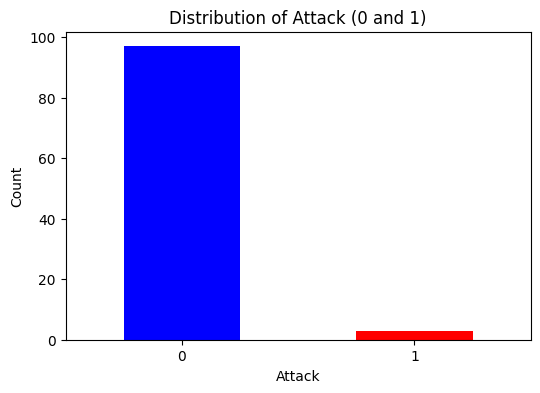

In [78]:
plt.figure(figsize=(6, 4))
df_Test['Attack'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Attack (0 and 1)')
plt.xlabel('Attack')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

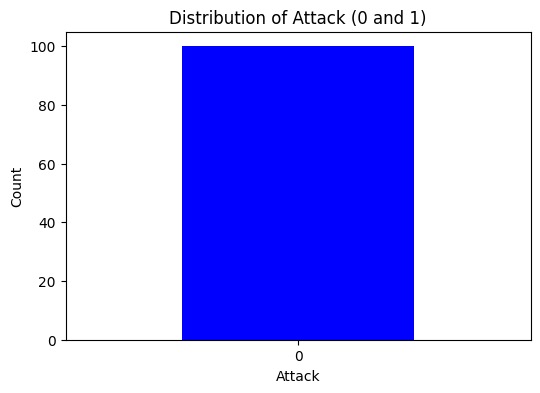

In [79]:
plt.figure(figsize=(6, 4))
df_Train['Attack'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Distribution of Attack (0 and 1)')
plt.xlabel('Attack')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [80]:
y_train = df_Train['Attack']

In [81]:
y_test = df_Test['Attack']

In [82]:
X_train = df_Train.drop(columns = 'Attack')

In [83]:
X_test = df_Test.drop(columns = 'Attack')

**1st model : Isolation Forest**

In [84]:
# Isolation Forest
def train_isolation_forest(data):
    model = IsolationForest( n_estimators=100, random_state=42 )
    return model

**2nd model : Robust Random Cut Forest**

In [85]:
# Robust Random Cut Forest
def train_rrcf(data, num_trees=50):
    model = rrcf(n_estimators=num_trees, random_state=42)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    return model

**3rd Model : HDBSCAN**

In [86]:
# HDBSCAN
def train_hdbscan(data):
    model = hdbscan.HDBSCAN()
    return model

**4th model: VAE**

In [87]:
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

import numpy as np
import tensorflow as tf
import keras
from keras import layers

In [88]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers

class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a data point."""
    def call(self, inputs, training=False):
        z_mean, z_log_var = inputs
        if training:
            batch = tf.shape(z_mean)[0]
            dim = tf.shape(z_mean)[1]
            epsilon = tf.random.normal(shape=(batch, dim))
            return z_mean + tf.exp(0.5 * z_log_var) * epsilon
        else:
            return z_mean + tf.exp(0.5 * z_log_var)

In [89]:
# Define the encoder
latent_dim = 2
encoder_inputs = keras.Input(shape=(37,))
x = layers.Dense(64, activation='relu')(encoder_inputs)
z_mean = layers.Dense(latent_dim, name='z_mean')(x)
z_log_var = layers.Dense(latent_dim, name='z_log_var')(x)
z = Sampling()([z_mean, z_log_var])
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name='encoder')

In [90]:
# Define the decoder
decoder_inputs = keras.Input(shape=(latent_dim,))
x = layers.Dense(64, activation='relu')(decoder_inputs)
outputs = layers.Dense(37, activation='sigmoid')(x)
decoder = keras.Model(decoder_inputs, outputs, name='decoder')

In [91]:
class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super().__init__(**kwargs)
        self.encoder = encoder
        self.decoder = decoder
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    def train_step(self, data):
        with tf.GradientTape() as tape:
            z_mean, z_log_var, z = self.encoder(data)
            reconstruction = self.decoder(z)
            reconstruction_loss = tf.reduce_mean(
                keras.losses.binary_crossentropy(data, reconstruction)
            )
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(kl_loss)
            total_loss = reconstruction_loss + kl_loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

    def call(self, data, training=False):
        if training:
            z_mean, z_log_var, z = self.encoder(data)
            return self.decoder(z)
        else:
            z_mean, _, z = self.encoder(data)
            return self.decoder(z)

In [92]:
"""(X_train, _), (X_test, _) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([X_train, X_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255
vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=30, batch_size=128)"""

'(X_train, _), (X_test, _) = keras.datasets.mnist.load_data()\nmnist_digits = np.concatenate([X_train, X_test], axis=0)\nmnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255\nvae = VAE(encoder, decoder)\nvae.compile(optimizer=keras.optimizers.Adam())\nvae.fit(mnist_digits, epochs=30, batch_size=128)'

In [93]:
class SVDD(Model):
    def __init__(self, input_dim, latent_dim):
        super(SVDD, self).__init__()
        self.encoder = tf.keras.Sequential([
            tf.keras.layers.Dense(32, activation='relu'),
            tf.keras.layers.Dense(16, activation='relu'),
            tf.keras.layers.Dense(latent_dim, activation='relu')
        ])
        self.center = tf.Variable(initial_value=tf.zeros((1, latent_dim)), trainable=True)

    @tf.function
    def call(self, x):
        z = self.encoder(x)  # Pass x directly to the encoder
        distance = tf.reduce_sum(tf.square(z - self.center), axis=1)
        return distance

    def compute_output_shape(self, input_shape):
        return (input_shape[0], 1)

    def decision_function(self, x):
      return self.predict(x)  # Assuming predict returns anomaly scores

def train_deep_svdd(X_train, latent_dim=2):
    svdd = SVDD(X_train.shape[1], latent_dim)
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Use learning_rate instead of lr
    svdd.compile(optimizer=optimizer, loss='mse')

    target_data = tf.ones((tf.shape(X_train)[0], 1))  # Create target data with the same shape as X_train

    for epoch in range(1, 31):
        history = svdd.fit(X_train, target_data, epochs=1, batch_size=64)  # Train for one epoch
        # Compute reconstruction loss on training data
        train_loss = history.history['loss'][0]

        # Print the reconstruction loss after each epoch
        print(f'Epoch {epoch}/30 - Training Loss: {train_loss:.4f}')
    return svdd



In [94]:
import numpy as np
from sklearn.ensemble import IsolationForest, RandomForestClassifier
import hdbscan
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import OneClassSVM
import keras

# Sigmoid function to convert anomaly scores into probabilities
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Step 1: Anomaly Detection Module
def anomaly_detection_module(X_train, X_test):
    # Initialize anomaly detection models
    models = {
        'Isolation Forest': IsolationForest(),
        'Random Forest': RandomForestClassifier(class_weight='balanced', n_estimators=100),
        'HDBSCAN': hdbscan.HDBSCAN(),
        'Deep SVDD': SVDD(X_train.shape[1], latent_dim=2),
        'Variational Autoencoder': VAE(encoder, decoder)
    }

    # Train anomaly detection models
    anomaly_scores_train = {}
    anomaly_scores_test = {}
    for name, model in models.items():
        if name == 'Isolation Forest':
            print("Isolation forest: ")
            # For Isolation Forest and HDBSCAN, we only need X_train
            model.fit(X_train)
            anomaly_scores_train[name] = sigmoid(model.decision_function(X_train))
            anomaly_scores_test[name] = sigmoid(model.decision_function(X_test))

        elif name == 'HDBSCAN':
            print("HDDBSCAN")
            # For HDBSCAN, obtain outlier scores directly after fitting the model
            model.fit(X_train)
            anomaly_scores_train[name] = sigmoid(model.outlier_scores_)
            anomaly_scores_test[name] = sigmoid(model.fit_predict(X_test))

        elif name == 'Variational Autoencoder':
            print("VAE: ")
            model = VAE(encoder, decoder)
            model.compile(optimizer=keras.optimizers.Adam())
            model.fit(X_train , epochs=30, batch_size=37)
            reconstruction_train = model.predict(X_train)
            reconstruction_test = model.predict(X_test)
            anomaly_scores_train[name] = sigmoid(np.mean(np.abs(X_train - reconstruction_train.squeeze()), axis=(1))).values
            anomaly_scores_test[name] = sigmoid(np.mean(np.abs(X_test - reconstruction_test.squeeze()), axis=(1))).values

        elif name == 'Deep SVDD':
            print("DEEP SVDD")
            # Train the Deep SVDD model
            model = train_deep_svdd(X_train)

            # Obtain anomaly scores for training and test data
            anomaly_scores_train[name] = sigmoid(-model.decision_function(X_train))  # Negative of decision function
            anomaly_scores_test[name] = sigmoid(-model.decision_function(X_test))  # Negative of decision function

        else:
            print("Random Forest")
            # For Random Forest, we need to transform labels into anomalies and normal
            y_train_labels = np.zeros(len(X_train))  # Assuming all are normal
            y_train_labels[y_train == 1] = 1  # Anomalies are labeled as 1
            model.fit(X_train, y_train_labels)
            anomaly_scores_train[name] = sigmoid(model.predict_proba(X_train)[:, 0])
            anomaly_scores_test[name] = sigmoid(model.predict_proba(X_test)[:, 0])

    return anomaly_scores_train, anomaly_scores_test


In [95]:
anomaly_scores_train, anomaly_scores_test = anomaly_detection_module(X_train, X_test)

Isolation forest: 
Random Forest
HDDBSCAN
DEEP SVDD
2/2 [==============================] - 6s 24ms/step - loss: 0.8253
Epoch 1/30 - Training Loss: 0.8253
2/2 [==============================] - 0s 16ms/step - loss: 0.6183
Epoch 2/30 - Training Loss: 0.6183
2/2 [==============================] - 0s 11ms/step - loss: 0.3787
Epoch 3/30 - Training Loss: 0.3787
2/2 [==============================] - 0s 12ms/step - loss: 0.1596
Epoch 4/30 - Training Loss: 0.1596
2/2 [==============================] - 0s 12ms/step - loss: 0.0226
Epoch 5/30 - Training Loss: 0.0226
2/2 [==============================] - 0s 35ms/step - loss: 0.0304
Epoch 6/30 - Training Loss: 0.0304
2/2 [==============================] - 0s 10ms/step - loss: 0.1127
Epoch 7/30 - Training Loss: 0.1127
2/2 [==============================] - 0s 11ms/step - loss: 0.1205
Epoch 8/30 - Training Loss: 0.1205
2/2 [==============================] - 0s 16ms/step - loss: 0.0630
Epoch 9/30 - Training Loss: 0.0630
2/2 [=========================

In [96]:
anomaly_scores_test

{'Isolation Forest': array([0.46500183, 0.47047831, 0.46429245, 0.4732861 , 0.46328155,
        0.45433096, 0.46194359, 0.47042572, 0.47314968, 0.45570447,
        0.4704349 , 0.46436228, 0.46900938, 0.46621165, 0.46853598,
        0.47550188, 0.46980365, 0.45596493, 0.45595601, 0.47245417,
        0.46729687, 0.47049989, 0.47271705, 0.47414139, 0.45820315,
        0.47068087, 0.46811127, 0.46939795, 0.46718074, 0.47439723,
        0.46911382, 0.45418111, 0.46511881, 0.46589107, 0.47901159,
        0.47024195, 0.47129733, 0.46865479, 0.4686247 , 0.46948105,
        0.46505676, 0.46159827, 0.46857485, 0.47536066, 0.46385185,
        0.46486547, 0.47554984, 0.47977648, 0.47099586, 0.46448844,
        0.47025032, 0.46920807, 0.46720615, 0.46086019, 0.45682926,
        0.46988327, 0.47061123, 0.4645137 , 0.47978793, 0.4561607 ,
        0.4686674 , 0.46025989, 0.46526495, 0.47503903, 0.46160742,
        0.46887346, 0.47223481, 0.46779899, 0.47015777, 0.46680968,
        0.47192434, 0.467695

In [97]:
anomaly_scores_train = {model: anomaly_scores_train[model].astype(np.float32) for model in anomaly_scores_train}
anomaly_scores_test = {model: anomaly_scores_test[model].astype(np.float32) for model in anomaly_scores_test}

In [98]:
E_train = anomaly_scores_train

In [99]:
anomaly_scores_train = pd.DataFrame.from_dict(E_train)

In [100]:
anomaly_scores_train

,Isolation Forest,Random Forest,HDBSCAN,Deep SVDD,Variational Autoencoder
0,0.478651,0.731059,0.597746,0.233180,0.520590
1,0.487126,0.731059,0.558758,0.240821,0.520155
2,0.490717,0.731059,0.527943,0.255718,0.518828
3,0.492629,0.731059,0.517925,0.262426,0.518118
4,0.494574,0.731059,0.531568,0.259733,0.517521
...,...,...,...,...,...
95,0.494434,0.731059,0.555470,0.265159,0.517346
96,0.493708,0.731059,0.500611,0.253903,0.516414
97,0.494940,0.731059,0.516845,0.257655,0.517034
98,0.495983,0.731059,0.516121,0.260527,0.517437


In [101]:
E_test = anomaly_scores_test

In [102]:
anomaly_scores_test = pd.DataFrame.from_dict(E_test)

In [103]:
anomaly_scores_test.shape

(100, 5)

In [119]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense

def combine_anomaly_scores(E_train, E_test):
    # Reshape the input arrays if they have an extra dimension
    if len(E_train.shape) > 2:
        E_train = np.squeeze(E_train)
    if len(E_test.shape) > 2:
        E_test = np.squeeze(E_test)

    # Concatenate anomaly scores along a new axis
    combined_train_scores = np.stack((E_train,), axis=-1)  # Fix: Added parentheses around E_train
    combined_test_scores = np.stack((E_test,), axis=-1)    # Fix: Added parentheses around E_test

    # Reshape the combined scores to be compatible with LSTM input
    combined_train_scores = combined_train_scores.reshape(combined_train_scores.shape[0], combined_train_scores.shape[1], -1)
    combined_test_scores = combined_test_scores.reshape(combined_test_scores.shape[0], combined_test_scores.shape[1], -1)

    model = Sequential()
    model.add(LSTM(50, input_shape=(combined_train_scores.shape[1], combined_train_scores.shape[2])))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')

    model.fit(combined_train_scores, np.zeros(combined_train_scores.shape[0]), epochs=50, batch_size=1, verbose=0)

    combined_train_scores_pred = model.predict(combined_train_scores)
    combined_test_scores_pred = model.predict(combined_test_scores)

    return combined_train_scores_pred.flatten(), combined_test_scores_pred.flatten()



In [120]:
# Call the function to combine anomaly scores
anomaly_scores_train = np.array(anomaly_scores_train)  # Convert anomaly_scores_train to numpy array
anomaly_scores_test = np.array(anomaly_scores_test)
combined_train_scores, combined_test_scores = combine_anomaly_scores(anomaly_scores_train, anomaly_scores_test)

# Print the combined anomaly scores for the training data
print("Combined anomaly scores for training data:")
print(combined_train_scores)

# Print the combined anomaly scores for the testing data
print("Combined anomaly scores for testing data:")
print(combined_test_scores)


4/4 [==============================] - 0s 6ms/step
Combined anomaly scores for training data:
[ 1.5187543e-06  2.6185764e-05  6.3193263e-05  7.6650875e-05
  5.6887744e-05  6.4626569e-05  6.9698552e-05  3.9004022e-05
  4.5039458e-05  3.5801204e-05  2.8276583e-05  2.0211795e-05
  1.9000610e-05  3.2501528e-05  3.8187252e-05  6.3467072e-05
  6.0959021e-05  3.9486447e-05  5.9945276e-05  6.7569548e-05
  7.2497642e-05  6.9354428e-05  6.8061287e-05  6.6703884e-05
  5.6805322e-05  1.1121645e-04  8.2284911e-05  5.1261159e-05
  5.5790646e-05  5.5310549e-05  5.3466531e-05  2.9853312e-05
  8.1220409e-05  2.4918234e-05  4.0592393e-05  4.9215974e-05
  3.3931108e-05  2.5855144e-05  3.9098086e-05  1.8044142e-05
  4.0564453e-05  5.3128926e-05  4.3697422e-05  5.1550334e-05
  7.1471790e-05  3.8366532e-05  6.6343462e-05  7.2370050e-05
  5.7491241e-05  6.0249818e-05  8.2219718e-05  7.6524215e-05
  4.8096059e-05  5.8660517e-05  4.1676918e-05  4.2178901e-05
  4.9274182e-05  5.7673315e-05  5.9911283e-05  3.916

In [214]:
import numpy as np
import tensorflow as tf
from sklearn.metrics import average_precision_score

# Function to compute accuracy
def compute_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Function to compute recall@K
def compute_recall_at_k(y_true, y_scores, k):
    sorted_indices = np.argsort(y_scores)[::-1][:k]
    top_k_labels = y_true[sorted_indices]
    return np.sum(top_k_labels) / np.sum(y_true)

# Function to compute precision
def compute_precision(y_true, y_pred):
    true_positives = np.sum((y_true == 1) & (y_pred == 1))
    predicted_positives = np.sum(y_pred == 1)
    return true_positives / predicted_positives if predicted_positives > 0 else 0.0

# Function to compute average precision
def compute_average_precision(y_true, y_scores):
    return average_precision_score(y_true, y_scores)

# Function to evaluate the model
def evaluate_model(model, X_test, y_test, threshold=0.5, k=100):
    ensemble_weights = model.predict(X_test)
    combined_anomaly_score = np.sum(ensemble_weights * anomaly_scores_test, axis=1)
    y_pred = (combined_anomaly_score >= threshold).astype(int)

    accuracy = compute_accuracy(y_test, y_pred)
    precision = compute_precision(y_test, y_pred)
    recall_at_k = compute_recall_at_k(y_test, combined_anomaly_score, k)
    average_precision = compute_average_precision(y_test, combined_anomaly_score)

    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall@{}:".format(k), recall_at_k)
    print("Average Precision:", average_precision)

In [215]:
import numpy as np
import tensorflow as tf

class EBDALM(tf.keras.Model):
    def __init__(self, input_dim, num_anomaly_detectors, hidden_units):
        super(EBDALM, self).__init__()
        self.num_anomaly_detectors = num_anomaly_detectors

        # Ensemble learning network
        self.ensemble_network = tf.keras.Sequential([
            tf.keras.layers.Dense(hidden_units, activation='relu', input_shape=(input_dim,)),
            tf.keras.layers.Dense(num_anomaly_detectors, activation='softmax')
        ])

    def call(self, inputs):
        inputs_tensor = tf.convert_to_tensor(inputs)  # Convert inputs to a tensor
        ensemble_weights = self.ensemble_network(inputs_tensor)
        return ensemble_weights

def generate_reference_score(mu, sigma, sample_size):
    reference_score = tf.random.normal((sample_size,), mean=mu, stddev=sigma)
    return reference_score


def compute_deviation(combined_anomaly_score, reference_score):
    deviation = tf.abs(combined_anomaly_score - reference_score)
    return deviation

def anomaly_loss(combined_anomaly_score, deviation, anomaly_label, threshold):
    loss = (1 - anomaly_label) * tf.abs(deviation) + anomaly_label * tf.maximum(0.0, threshold - tf.abs(deviation))
    return loss


def train_EBDALM(X_train, anomaly_scores_train, y_train, mu, sigma, sample_size, threshold, epochs, batch_size, learning_rate):
    # Convert pandas Series to numpy arrays
    X_train = X_train.values
    anomaly_scores_train = anomaly_scores_train
    y_train = y_train.values

    num_anomaly_detectors = anomaly_scores_train.shape[1]
    input_dim = X_train.shape[1]

    model = EBDALM(input_dim, num_anomaly_detectors, hidden_units=64)
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    for epoch in range(epochs):
        for i in range(0, len(X_train), batch_size):
            batch_X = X_train[i:i+batch_size]
            batch_E = anomaly_scores_train[i:i+batch_size]
            batch_Y = y_train[i:i+batch_size]

            with tf.GradientTape() as tape:
                ensemble_weights = model(batch_X)
                combined_anomaly_score = tf.reduce_sum(ensemble_weights * batch_E, axis=1)
                reference_score = generate_reference_score(mu, sigma, sample_size)
                deviation = compute_deviation(combined_anomaly_score, reference_score)

                # Print inputs to the loss function
                #print("Combined Anomaly Score:", combined_anomaly_score)
                #print("Deviation:", deviation)
                #print("Batch Y:", batch_Y)

                loss = anomaly_loss(combined_anomaly_score, deviation, batch_Y, threshold)

                # Convert loss to a TensorFlow tensor
                loss_tensor = tf.convert_to_tensor(loss, dtype=tf.float32)

                # Watch the trainable variables
                tape.watch(model.trainable_variables)

            gradients = tape.gradient(loss_tensor, model.trainable_variables)
            optimizer.apply_gradients(zip(gradients, model.trainable_variables))

        print("Epoch {}/{} - Loss: {:.4f}".format(epoch+1, epochs, np.mean(loss)))
        evaluate_model(model, X_test, y_test)

    return model


In [216]:
model = train_EBDALM(X_train, anomaly_scores_train, y_train, mu=0, sigma=1, sample_size=100, threshold=0.5, epochs=200, batch_size=100, learning_rate=0.001)

Epoch 1/200 - Loss: 0.9829
4/4 [==============================] - 0s 3ms/step
Accuracy: 0.63
Precision: 0.027777777777777776
Recall@100: 1.0
Average Precision: 0.05932735186520334
Epoch 2/200 - Loss: 1.0193
4/4 [==============================] - 0s 4ms/step
Accuracy: 0.63
Precision: 0.027777777777777776
Recall@100: 1.0
Average Precision: 0.05898996994887406
Epoch 3/200 - Loss: 0.9907
4/4 [==============================] - 0s 4ms/step
Accuracy: 0.63
Precision: 0.027777777777777776
Recall@100: 1.0
Average Precision: 0.05879629629629629
Epoch 4/200 - Loss: 0.9148
4/4 [==============================] - 0s 3ms/step
Accuracy: 0.63
Precision: 0.027777777777777776
Recall@100: 1.0
Average Precision: 0.06922398589065255
Epoch 5/200 - Loss: 0.9153
4/4 [==============================] - 0s 3ms/step
Accuracy: 0.63
Precision: 0.027777777777777776
Recall@100: 1.0
Average Precision: 0.06891348088531186
Epoch 6/200 - Loss: 1.0042
4/4 [==============================] - 0s 3ms/step
Accuracy: 0.63
Precisi